# Attempt 1

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to detect defects
def detect_defects(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Define a list to store defect contours
    defect_contours = []

    # Define area threshold to filter out small contours
    area_threshold = 1000

    # Loop over the contours
    for contour in contours:
        # Approximate the contour to reduce the number of points
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # If the contour has fewer than a certain number of points, consider it as a defect
        if len(approx) < 50:
            defect_contours.append(contour)

    return defect_contours


In [ ]:

# Function to outline defects
def outline_defects(image, defect_contours):
    outlined_image = image.copy()
    for contour in defect_contours:
        cv2.drawContours(outlined_image, [contour], -1, (0, 0, 255), 2)  # Outline defects in red
    return outlined_image

In [ ]:
# Function to outline glove if no defects are found
def outline_glove(image):
    # Your algorithm to detect glove and its contours if no defects are found
    outlined_image = image.copy()
    # Assuming glove_contours is the contour of the glove
    cv2.drawContours(outlined_image, [glove_contours], -1, (0, 255, 0), 2)  # Outline glove in green
    return outlined_image


In [ ]:

# Load the image from Google Drive
image_path = '/content/drive/My Drive/dirty1.jpg'
image = cv2.imread(image_path)


In [ ]:
# Preprocessing steps if needed


In [ ]:
# Detect defects
defect_contours = detect_defects(image)


In [ ]:
# If defects are found, outline them
if defect_contours:
    result_image = outline_defects(image, defect_contours)
else:
    result_image = outline_glove(image)


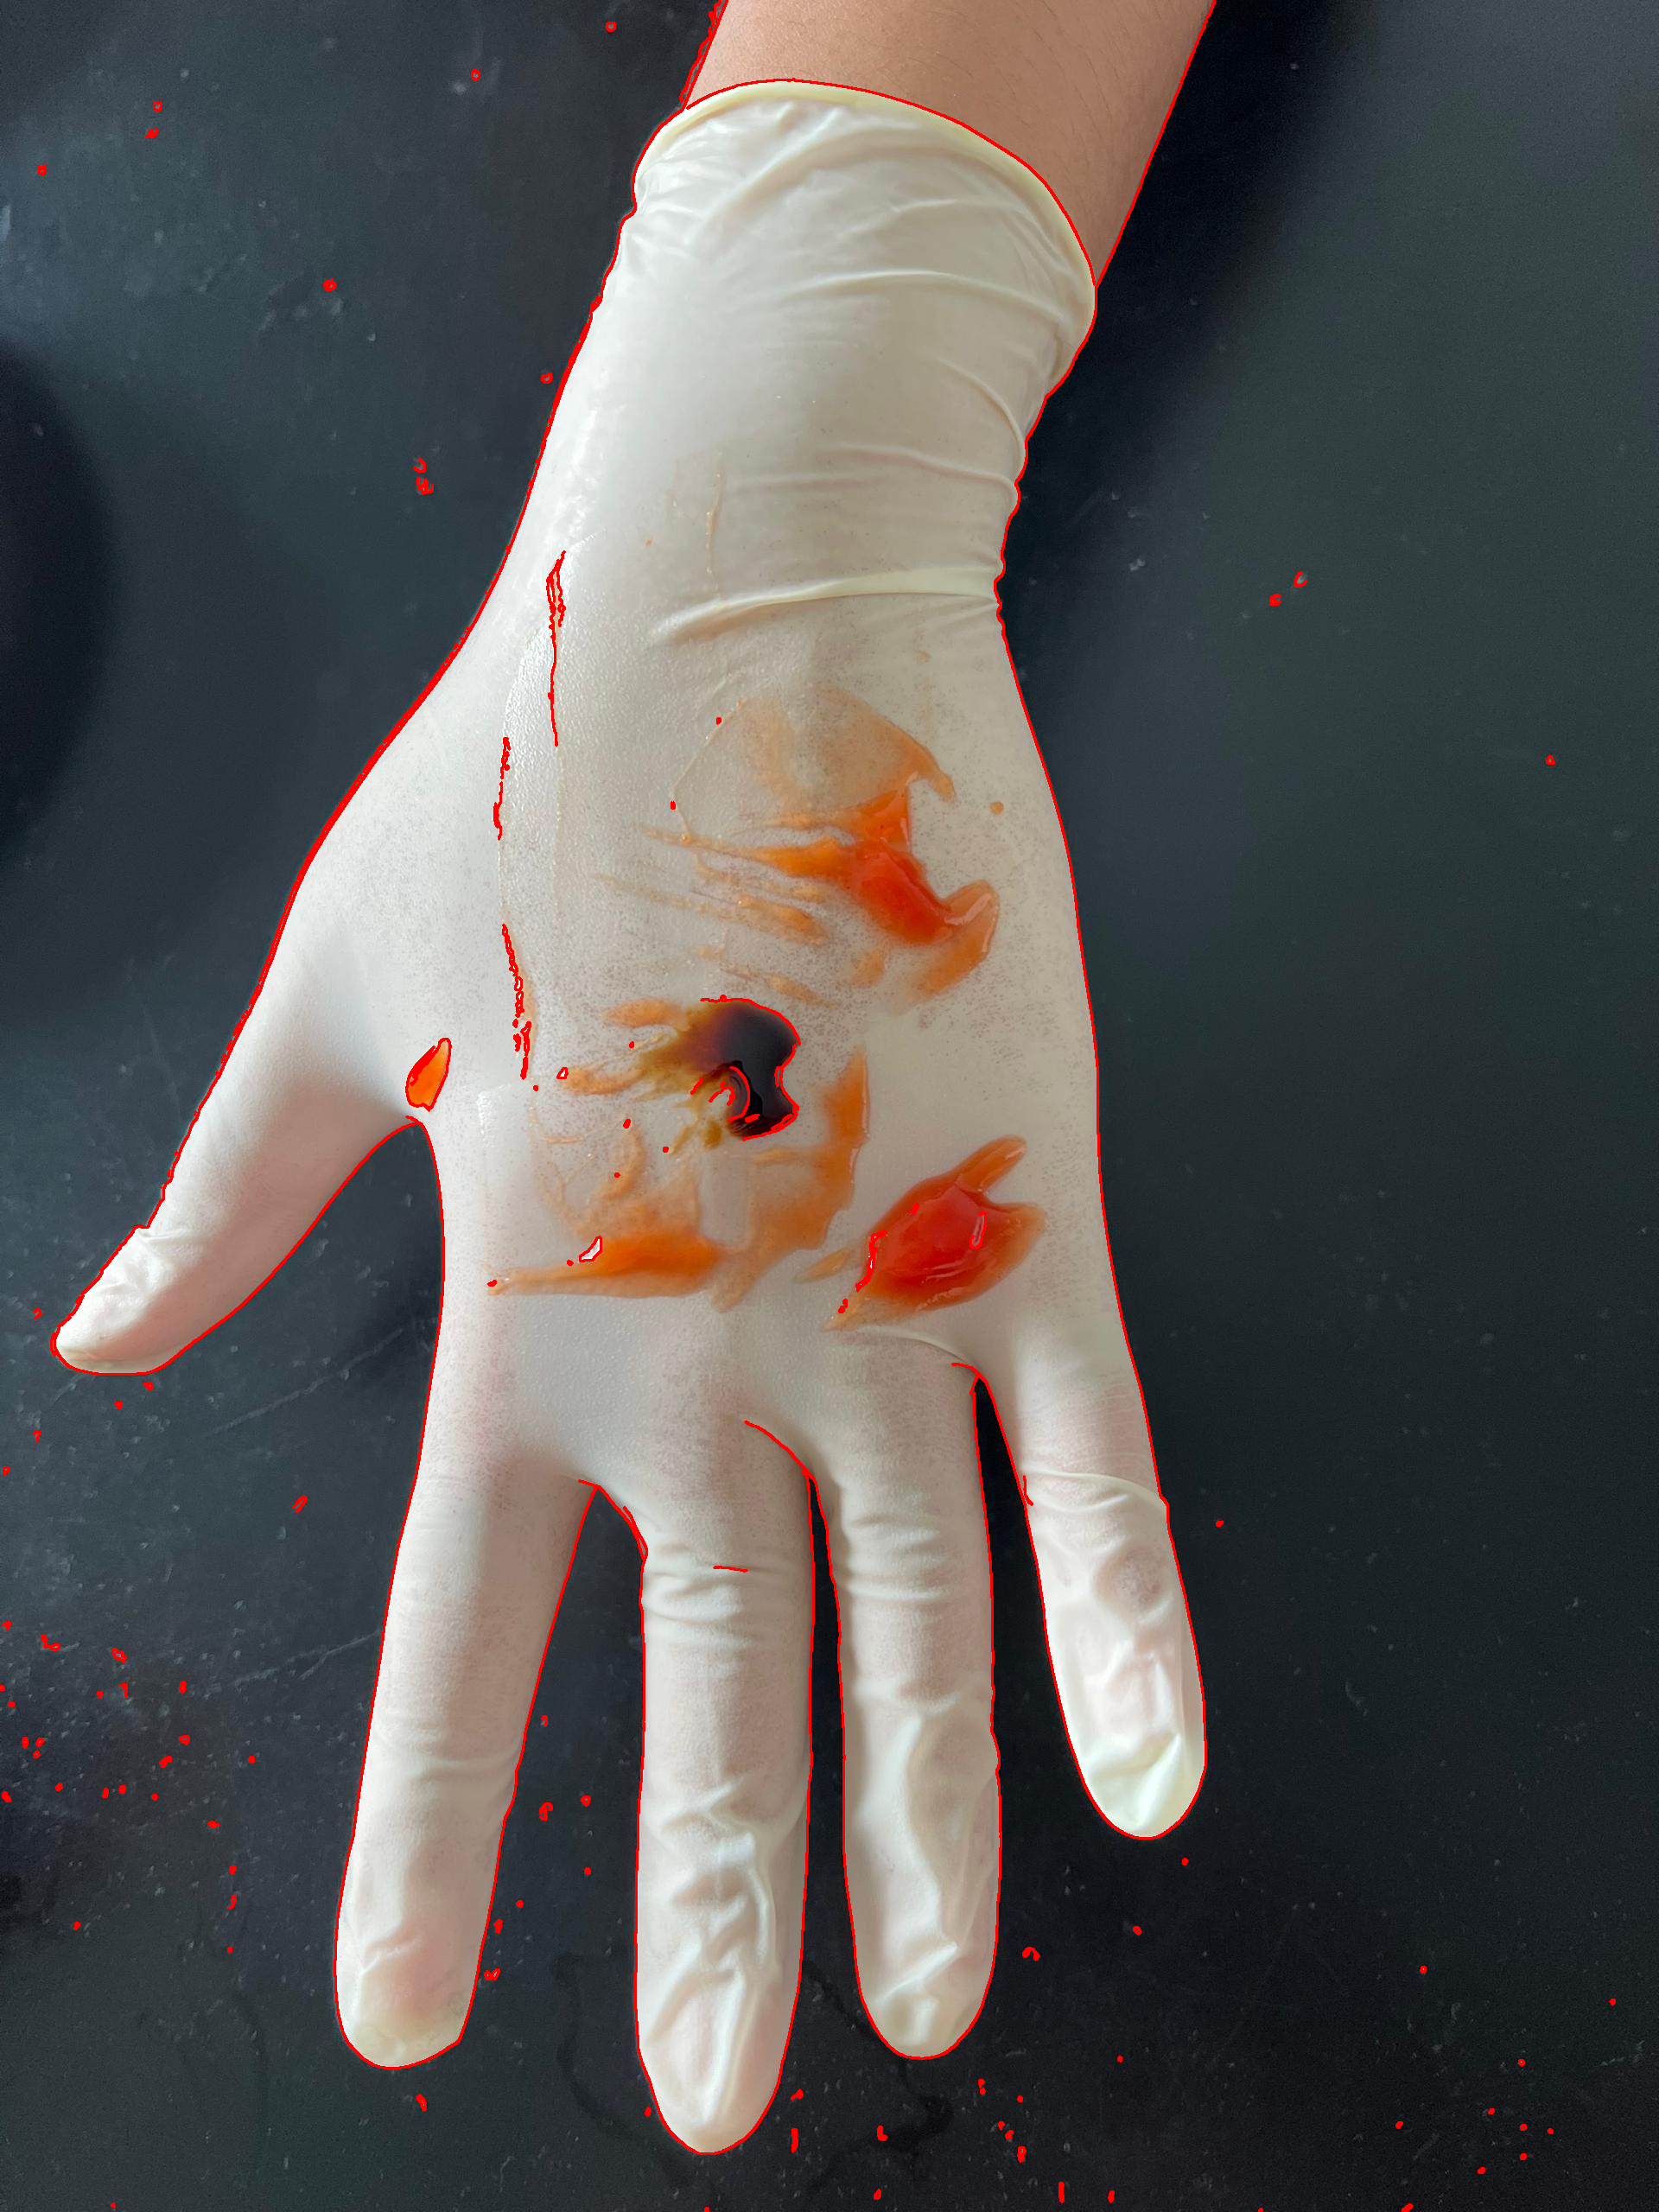

In [ ]:

cv2_imshow(result_image)


# Attempt 2

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import ttk
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def detect_defects(image, blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (blur_kernel_size, blur_kernel_size), 0)
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    defect_contours = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if area < area_threshold:
            continue
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) < point_threshold:
            defect_contours.append(contour)

    return defect_contours

def outline_defects(image, defect_contours):
    outlined_image = image.copy()
    for contour in defect_contours:
        cv2.drawContours(outlined_image, [contour], -1, (0, 0, 255), 2)
    return outlined_image

def update_parameters():
    blur_kernel_size = int(blur_slider.get())
    canny_threshold1 = int(canny_threshold1_slider.get())
    canny_threshold2 = int(canny_threshold2_slider.get())
    area_threshold = int(area_threshold_slider.get())
    point_threshold = int(point_threshold_slider.get())

    defect_contours = detect_defects(image, blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold)

    if defect_contours:
        result_image = outline_defects(image, defect_contours)
    else:
        result_image = image.copy()

    # Resize the window
    cv2.resizeWindow('Output', desired_width, desired_height)

    cv2.imshow('Output', result_image)
    cv2.waitKey(1)

# Load the image
image_path = '/content/drive/My Drive/dirty1.jpg'
image = cv2.imread(image_path)

# Initialize GUI
root = tk.Tk()
root.title("Defect Detection Parameters")

# Blur Kernel Size
blur_label = ttk.Label(root, text="Blur Kernel Size:")
blur_label.grid(row=0, column=0)
blur_slider = ttk.Scale(root, from_=1, to=15, orient=tk.HORIZONTAL)
blur_slider.set(5)
blur_slider.grid(row=0, column=1)

# Canny Threshold 1
canny_threshold1_label = ttk.Label(root, text="Canny Threshold 1:")
canny_threshold1_label.grid(row=1, column=0)
canny_threshold1_slider = ttk.Scale(root, from_=0, to=200, orient=tk.HORIZONTAL)
canny_threshold1_slider.set(50)
canny_threshold1_slider.grid(row=1, column=1)

# Canny Threshold 2
canny_threshold2_label = ttk.Label(root, text="Canny Threshold 2:")
canny_threshold2_label.grid(row=2, column=0)
canny_threshold2_slider = ttk.Scale(root, from_=0, to=200, orient=tk.HORIZONTAL)
canny_threshold2_slider.set(150)
canny_threshold2_slider.grid(row=2, column=1)

# Area Threshold
area_threshold_label = ttk.Label(root, text="Area Threshold:")
area_threshold_label.grid(row=3, column=0)
area_threshold_slider = ttk.Scale(root, from_=0, to=5000, orient=tk.HORIZONTAL)
area_threshold_slider.set(1000)
area_threshold_slider.grid(row=3, column=1)

# Point Threshold
point_threshold_label = ttk.Label(root, text="Point Threshold:")
point_threshold_label.grid(row=4, column=0)
point_threshold_slider = ttk.Scale(root, from_=0, to=100, orient=tk.HORIZONTAL)
point_threshold_slider.set(50)
point_threshold_slider.grid(row=4, column=1)

# Display the image
cv2.namedWindow('Output', cv2.WINDOW_NORMAL)
cv2.imshow('Output', image)

# Define the desired width and height for the window
desired_width = 800
desired_height = 1000

# Resize the window
cv2.resizeWindow('Output', desired_width, desired_height)

# Update Button
update_button = ttk.Button(root, text="Update Parameters", command=update_parameters)
update_button.grid(row=5, column=0, columnspan=2)

root.mainloop()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import cv2
import numpy as np
from google.colab import drive
from ipywidgets import interact, IntSlider

# Mount Google Drive
drive.mount('/content/drive')

def detect_defects(image, blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (blur_kernel_size, blur_kernel_size), 0)
    edges = cv2.Canny(blurred, canny_threshold1, canny_threshold2)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    defect_contours = []

    for contour in contours:
        area = cv2.contourArea(contour)
        if area < area_threshold:
            continue
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) < point_threshold:
            defect_contours.append(contour)

    result_image = image.copy()
    for contour in defect_contours:
        cv2.drawContours(result_image, [contour], -1, (0, 0, 255), 2)

    return result_image

# Load the image from Google Drive
image_path = '/content/drive/My Drive/dirty1.jpg'
image = cv2.imread(image_path)

def update_parameters(blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold):
    result_image = detect_defects(image, blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold)
    cv2_imshow(result_image)

# Define sliders for parameters
blur_slider = IntSlider(min=1, max=15, step=1, value=5)
canny_threshold1_slider = IntSlider(min=0, max=200, step=1, value=50)
canny_threshold2_slider = IntSlider(min=0, max=200, step=1, value=150)
area_threshold_slider = IntSlider(min=0, max=5000, step=1, value=1000)
point_threshold_slider = IntSlider(min=0, max=100, step=1, value=50)

# Create interactive widget
interact(update_parameters,
         blur_kernel_size=blur_slider,
         canny_threshold1=canny_threshold1_slider,
         canny_threshold2=canny_threshold2_slider,
         area_threshold=area_threshold_slider,
         point_threshold=point_threshold_slider)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


interactive(children=(IntSlider(value=5, description='blur_kernel_size', max=15, min=1), IntSlider(value=50, d…

<function __main__.update_parameters(blur_kernel_size, canny_threshold1, canny_threshold2, area_threshold, point_threshold)>